# Kmeans

## Introducción

Crea grupos de ovservaciones con características similares que sean distintas a las observaciones de otros grupos.

### Características

- Algoritmo no supervisado.
- No tiene variable dependiente.
- Método de agrupamiento (Clustering)

### Utilidad

- Explorar, describir y resumir los datos de manera sencilla.
- Confirmar o rechazar alguna clasificación previa.
- Desubrir patrones y relaciones.

### Ventajas

- Rápido de ejecutar.
- Almacenamiento económico.

### Desventajas

- Hay que probar con varios números de clusters (Existen algunas heurísticas que se pueden utilizar)
- La existencia de valores atípicos pueden afectar el resultado.

### Ejemplos de uso

- Segmentación de clientes.
- Comunidades en redes sociales.
- Agrupación de textos similares.

## Introducción

Crea grupos de ovservaciones con características similares que sean distintas a las observaciones de otros grupos.

### Características

- Algoritmo no supervisado.
- No tiene variable dependiente.
- Método de agrupamiento (Clustering)

### Utilidad

- Explorar, describir y resumir los datos de manera sencilla.
- Confirmar o rechazar alguna clasificación previa.
- Desubrir patrones y relaciones.

### Ventajas

- Rápido de ejecutar.
- Almacenamiento económico.

### Desventajas

- Hay que probar con varios números de clusters (Existen algunas heurísticas que se pueden utilizar)
- La existencia de valores atípicos pueden afectar el resultado.

### Ejemplos de uso

- Segmentación de clientes.
- Comunidades en redes sociales.
- Agrupación de textos similares.

#  Implementación

Necesitamos instalar scikit-learn dentro de nuestro entorno además de las librerías que hemos usado hasta ahora: pandas, matplotlib, jupyterlab

## Cargamos nuestro archivo de datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Lidiamos con valores nulos

Kmeans no admite el uso de valores nulos por lo que debemos usar eliminación, imputación o anotación con ellos. Para simplifcar el ejemplo usaremos eliminación.

In [4]:
df = df.dropna()

## Codificamos variables no numéricas

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if column != "Name" and df[column].dtype == "O":
        df[column] = le.fit_transform(df[column])

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Usamos el método del codo para encontrar la mejor k

El método del codo es una técnica utilizada para determinar el número óptimo de clusters (k) en un algoritmo de clustering, como K-means. La idea principal es ejecutar el algoritmo de clustering para diferentes valores de k y calcular la suma de los errores cuadráticos (SSE) para cada k. El SSE es la suma de las distancias al cuadrado entre cada punto de datos y el centroide de su cluster más cercano.

A medida que aumentamos el número de clusters, el SSE tiende a disminuir porque los puntos de datos están más cerca de sus centroides. Sin embargo, llega un punto donde la disminución del SSE se vuelve menos pronunciada. Este punto se conoce como el "codo" y representa el número óptimo de clusters. Elegir k en este punto asegura un buen balance entre la simplicidad del modelo y la precisión del clustering.

### Pasos para aplicar el método del codo:
1. Ejecutar el algoritmo K-means para un rango de valores de k (por ejemplo, de 1 a 10).
2. Calcular el SSE para cada valor de k.
3. Graficar los valores de k en el eje x y el SSE en el eje y.
4. Identificar el punto donde la disminución del SSE se vuelve menos pronunciada (el codo).

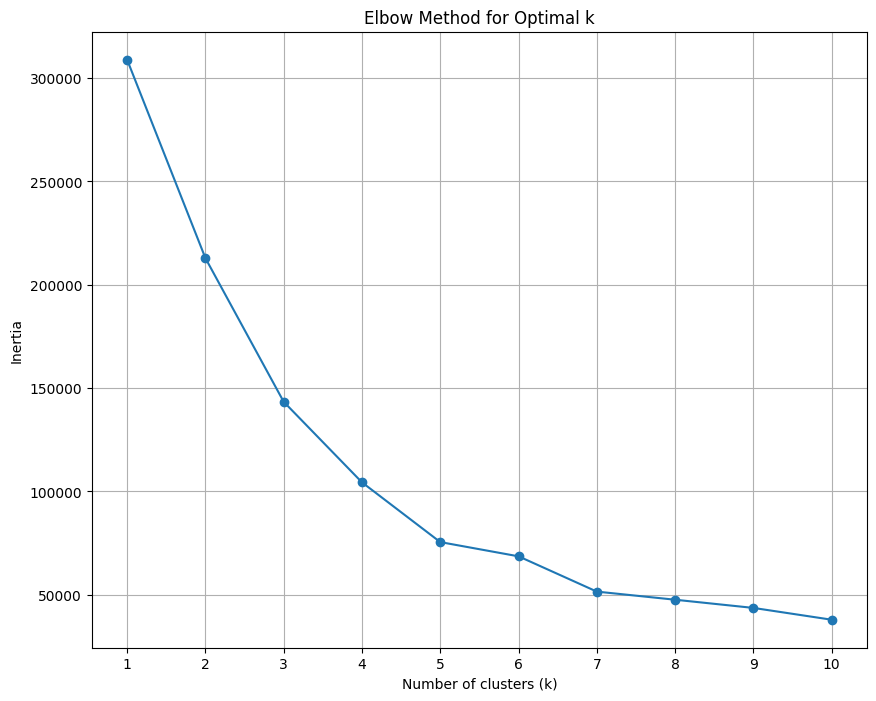

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.drop(columns=["CustomerID"]))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Graficamos nuestros resultados

In [8]:
from sklearn.decomposition import PCA

In [9]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(df.drop(columns=["CustomerID"]))
df["Cluster"] = kmeans.labels_

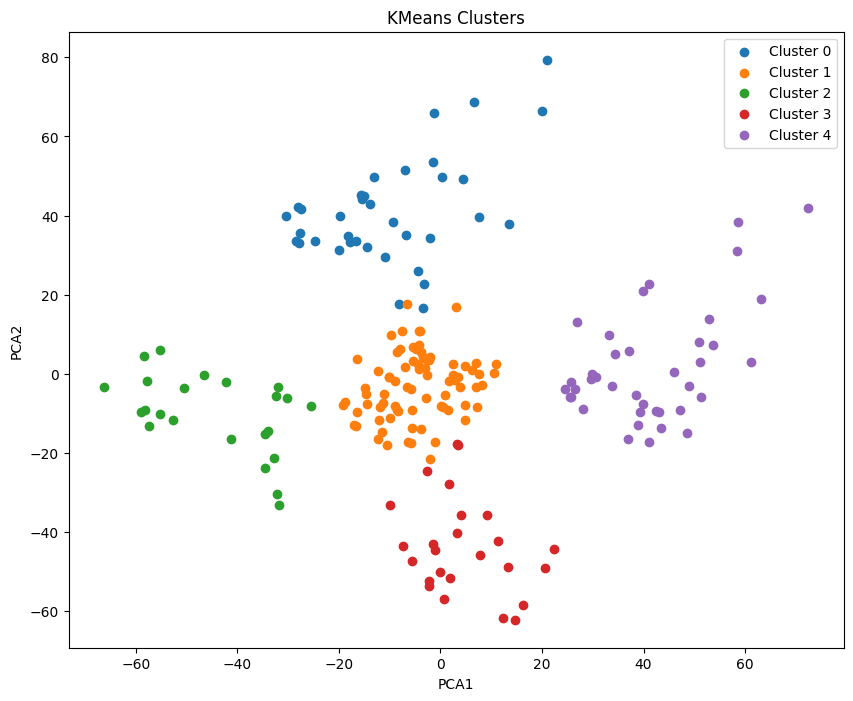

In [10]:
# Reducimos la dimensionalidad de los datos a 2 para poder visualizarlos
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["CustomerID", "Cluster"]))

# Creamos un DataFrame con los datos reducidos y el cluster asignado 
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

# Visualizamos los clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_data = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}")

plt.title("KMeans Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()